In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
from imblearn.over_sampling import SMOTE

In [43]:
df = pd.read_csv("Customer Churn.csv")

In [44]:
df.shape

(3150, 14)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [46]:
df.isnull().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [47]:
df.duplicated().sum()

300

In [48]:
df = df.drop_duplicates()

In [49]:
df.duplicated().sum()

0

In [50]:
# Drop irrelevant columns
df = df.drop(columns=['Age'])

In [51]:
df['Churn'].value_counts()

Churn
0    2404
1     446
Name: count, dtype: int64

C:\Users\maliv\AppData\Local\Temp\ipykernel_25384\2807788532.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='coolwarm')


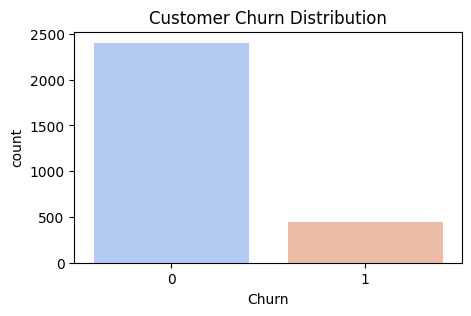

In [52]:
# Churn distribution visualization
plt.figure(figsize=(5, 3))
sns.countplot(x='Churn', data=df, palette='coolwarm')
plt.title("Customer Churn Distribution")
plt.show()

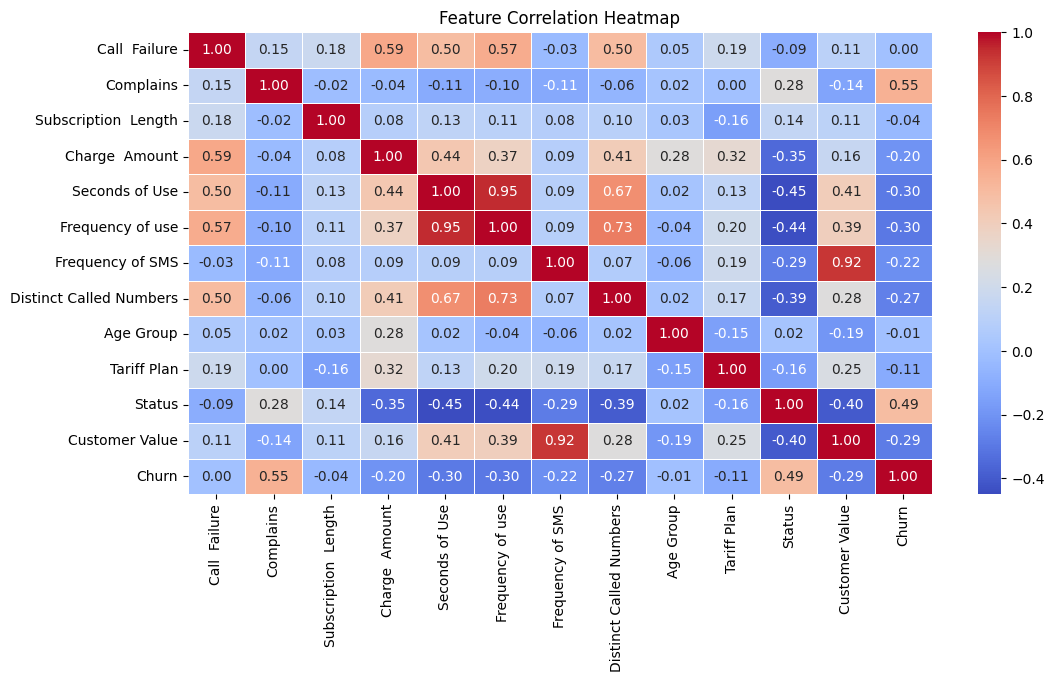

In [53]:
# Feature correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [54]:
# Check categorical feature distributions
categorical_cols = ['Tariff Plan', 'Status', 'Age Group']
for col in categorical_cols:
    print(f"\n{col} Value Counts:\n", df[col].value_counts())

# Clean column names (remove spaces)
df.columns = df.columns.str.strip()


Tariff Plan Value Counts:
 Tariff Plan
1    2621
2     229
Name: count, dtype: int64

Status Value Counts:
 Status
1    2166
2     684
Name: count, dtype: int64

Age Group Value Counts:
 Age Group
3    1296
2     921
4     367
5     154
1     112
Name: count, dtype: int64


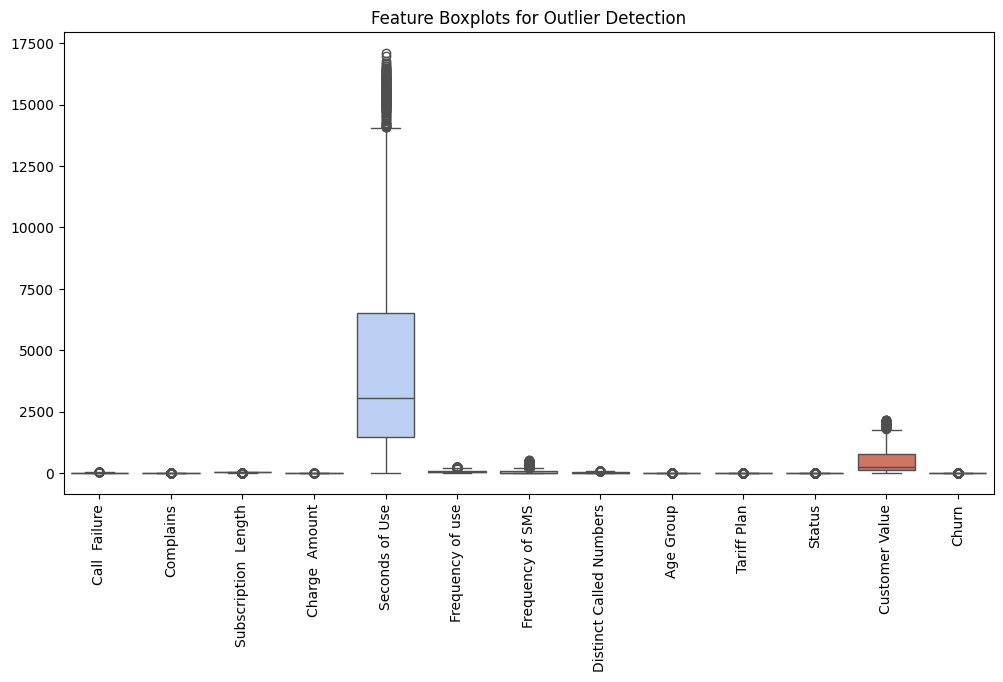

In [55]:
# Boxplot to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Feature Boxplots for Outlier Detection")
plt.show()

In [56]:
df.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status',
       'Customer Value', 'Churn'],
      dtype='object')

In [57]:
df.rename(columns={'Subscription  Length': 'Subscription Length'}, inplace=True)

C:\Users\maliv\AppData\Local\Temp\ipykernel_25384\411644310.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Subscription Length', data=df, palette='coolwarm')


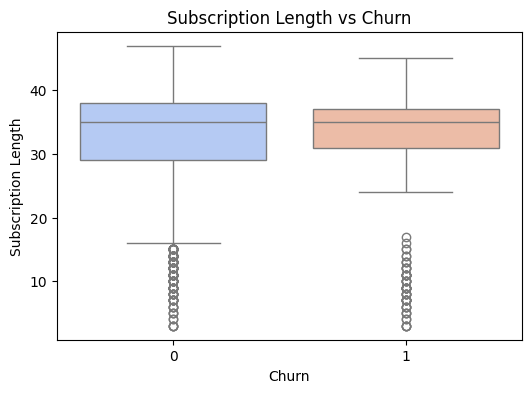

In [58]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Churn', y='Subscription Length', data=df, palette='coolwarm')
plt.title("Subscription Length vs Churn")
plt.show()

C:\Users\maliv\AppData\Local\Temp\ipykernel_25384\2180001320.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Charge  Amount', data=df, palette='coolwarm')


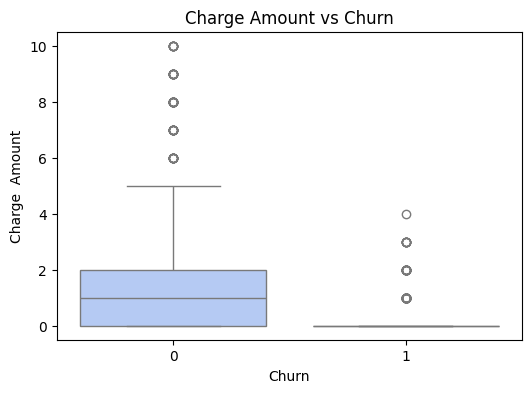

In [59]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Churn', y='Charge  Amount', data=df, palette='coolwarm')
plt.title("Charge Amount vs Churn")
plt.show()

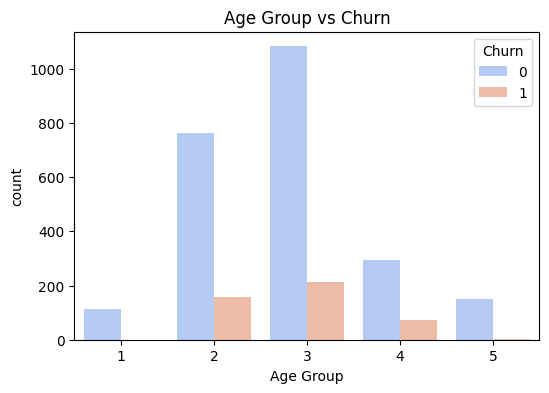

In [60]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Age Group', hue='Churn', data=df, palette='coolwarm')
plt.title("Age Group vs Churn")
plt.show()

In [61]:
df['Churn'].value_counts()

Churn
0    2404
1     446
Name: count, dtype: int64

In [62]:
# Outlier removal using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
columns_to_check = df.columns[df.columns != 'Churn']
df = df[~((df[columns_to_check] < (Q1[columns_to_check] - 3.0 * IQR[columns_to_check])) | 
          (df[columns_to_check] > (Q3[columns_to_check] + 3.0 * IQR[columns_to_check]))).any(axis=1)]

In [63]:
df['Churn'].value_counts()

Churn
0    1635
1      64
Name: count, dtype: int64

In [64]:
# Feature Engineering - Polynomial Features
feature_cols = ['Subscription Length', 'Charge  Amount', 'Seconds of Use', 'Frequency of use', 'Customer Value']
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(df[feature_cols])
df_poly = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(feature_cols))
df = pd.concat([df, df_poly], axis=1)

In [65]:
# Log transformation for skewed data
df['Seconds of Use'] = np.log1p(df['Seconds of Use'])

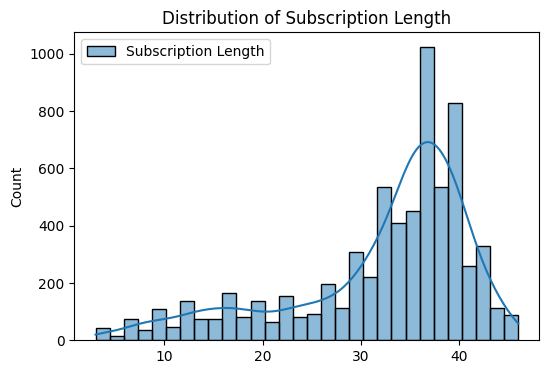

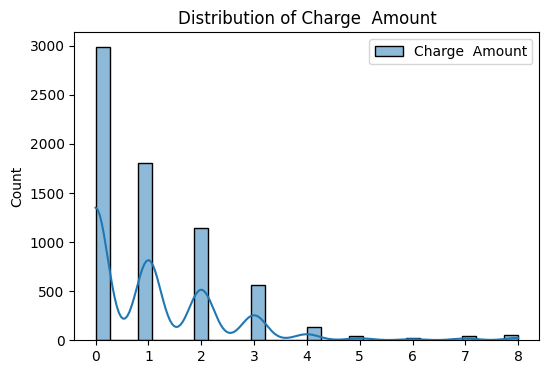

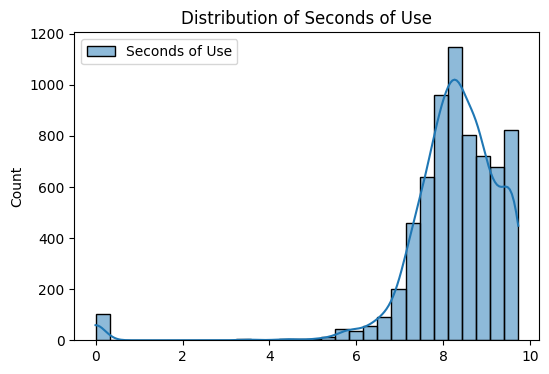

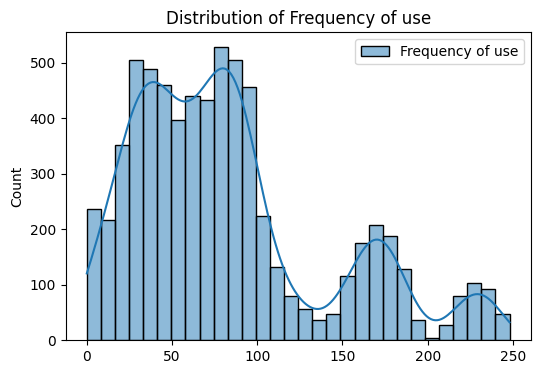

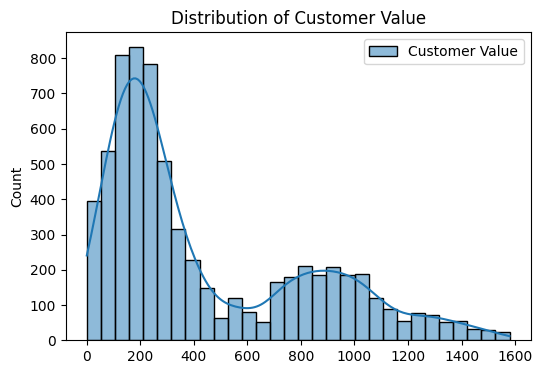

In [66]:
# Function to plot distributions
def plot_distribution(col):
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

# Plot distributions
for col in feature_cols:
    plot_distribution(col)

In [67]:
# Convert categorical variables to numeric
label_encoders = {}
for col in ['Tariff Plan', 'Status', 'Age Group']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [68]:
# Define features and target
X = df.drop(columns=['Churn'])
y = df['Churn']

In [69]:
# Fill missing values
X.fillna(X.median(), inplace=True)
y.fillna(y.median(), inplace=True)

In [70]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
# Handle class imbalance using SMOTE
if len(np.unique(y_train)) > 1:
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
# ANN Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

C:\Users\maliv\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [74]:
# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/50
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7650 - loss: 0.4704 - val_accuracy: 0.9076 - val_loss: 0.2103
Epoch 2/50
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - accuracy: 0.9212 - loss: 0.2313 - val_accuracy: 0.9322 - val_loss: 0.1798
Epoch 3/50
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - accuracy: 0.9467 - loss: 0.1701 - val_accuracy: 0.9466 - val_loss: 0.1449
Epoch 4/50
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - accuracy: 0.9574 - loss: 0.1415 - val_accuracy: 0.9548 - val_loss: 0.1352
Epoch 5/50
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9558 - loss: 0.1352 - val_accuracy: 0.9466 - val_loss: 0.1572
Epoch 6/50
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - accuracy: 0.9709 - loss: 0.1090 - val_accuracy: 0.9507 - val_loss: 0.1423
Epoch 7/50
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - accuracy: 0.9779 - loss: 0.0780 - val_accuracy: 0.9528 - val_loss: 0.1378
Epoch 8/50
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.9857 - loss: 0.0567 - val_

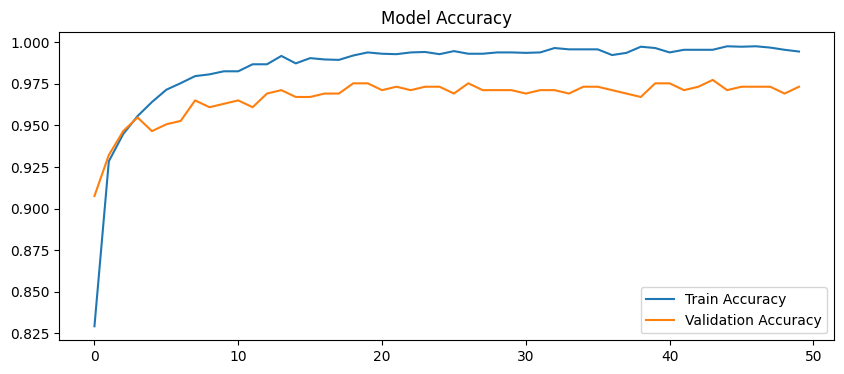

In [75]:
# Plot training history
plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()

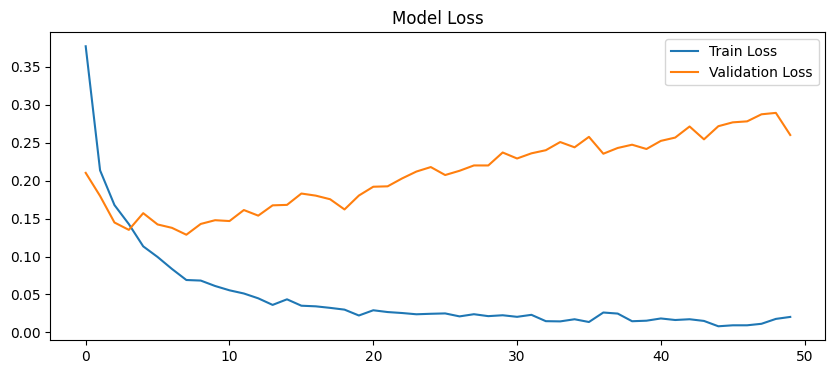

In [76]:
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")
plt.show()

In [77]:
# Model Evaluation
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       476
         1.0       0.43      0.55      0.48        11

    accuracy                           0.97       487
   macro avg       0.71      0.76      0.73       487
weighted avg       0.98      0.97      0.97       487

Accuracy Score: 0.973305954825462


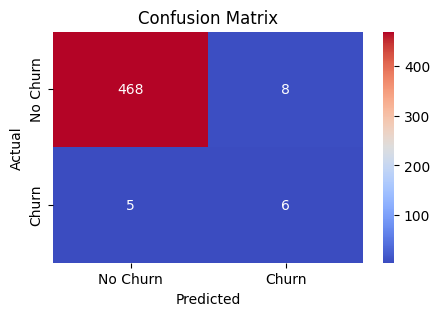

In [78]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


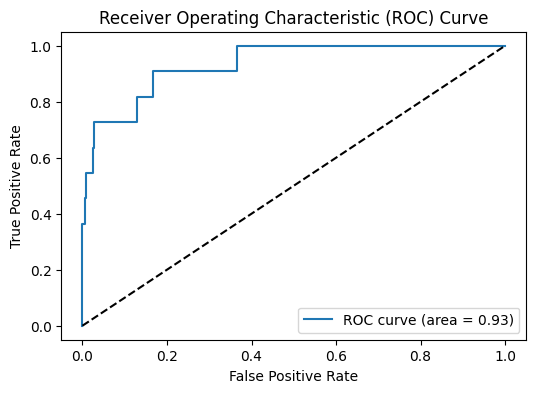

In [79]:
# ROC Curve
y_prob = model.predict(X_test)
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [80]:
# Display Model Summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 64)             │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,717 (45.77 KB)

 Trainable params: 3,905 (15.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,812 (30.52 KB)

In [89]:
for i, layer in enumerate(model.layers):
    print(f"Layer {i+1}: {layer.name} | Type: {layer.__class__.__name__} | Output Shape: {layer.output.shape} | Params: {layer.count_params()}")


Layer 1: dense_26 | Type: Dense | Output Shape: (None, 128) | Params: 3584
Layer 2: dropout_14 | Type: Dropout | Output Shape: (None, 128) | Params: 0
Layer 3: dense_27 | Type: Dense | Output Shape: (None, 64) | Params: 8256
Layer 4: dropout_15 | Type: Dropout | Output Shape: (None, 64) | Params: 0
Layer 5: dense_28 | Type: Dense | Output Shape: (None, 32) | Params: 2080
Layer 6: dense_29 | Type: Dense | Output Shape: (None, 1) | Params: 33


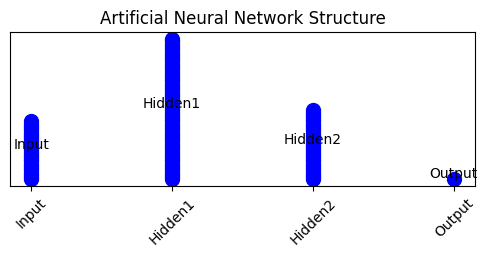

In [88]:
import matplotlib.pyplot as plt

def draw_ann(layers):
    fig, ax = plt.subplots(figsize=(6, len(layers) * 0.5))

    for i, (name, neurons) in enumerate(layers.items()):
        ax.scatter([i] * neurons, range(neurons), color="blue", s=100)
        ax.text(i, neurons / 2, name, ha="center", fontsize=10, color="black")

    ax.set_xticks(range(len(layers)))
    ax.set_xticklabels(layers.keys(), rotation=45)
    ax.set_yticks([])
    ax.set_title("Artificial Neural Network Structure")
    plt.show()

# Define your ANN layers (layer_name: number_of_neurons)
layers = {"Input": X_train.shape[1], "Hidden1": 64, "Hidden2": 32, "Output": 1}

draw_ann(layers)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict on test data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astypse(int)  # Convert probabilities to binary (0 or 1)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [92]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.80      0.88       476
         1.0       0.05      0.45      0.09        11

    accuracy                           0.79       487
   macro avg       0.52      0.63      0.48       487
weighted avg       0.96      0.79      0.86       487



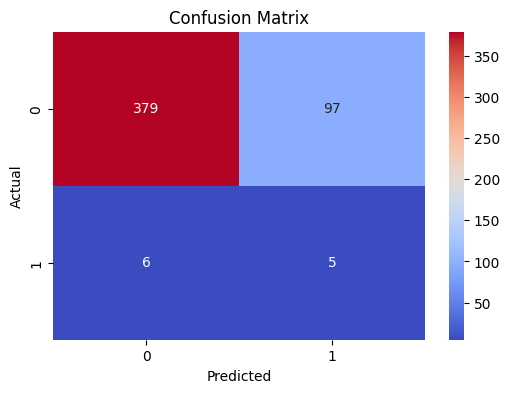

In [93]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [95]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7885010266940452